In [2]:
from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import os
import textwrap

In [3]:
home_dir=os.environ['HOME']
HOME=Path(home_dir)

In [4]:
rose='u-dg767'
ANCILLARY_DIR= HOME / 'cylc-run' / rose / 'share/data/ancils/aus2200'

In [5]:
ERA_DIR = ANCILLARY_DIR / 'era5/'
D0198_DIR = ANCILLARY_DIR / 'd0198/'

In [6]:
# We need to import ants to read in UM file formats
import ants

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/esmf.py:26: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/_ugrid.py:19: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/experimental/raster.py:29: IrisDeprecation: iris.experimental.raster is deprecated since version 3.2, and will be removed in a future release. If you make use of this functionality, please contact the Iris Developers to discuss how to retain it (which may involve reversing the deprecation).
  warn_deprecated(wmsg)


In [7]:
# Plot the land sea mask and fractions files
MASK_FILE_ERA = ERA_DIR / 'qrparm.mask'
MASK_FILE_D0198 = D0198_DIR / 'qrparm.mask'

In [8]:
mask_cube_era = ants.load(MASK_FILE_ERA)
mask_cube_d0198 = ants.load(MASK_FILE_D0198)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


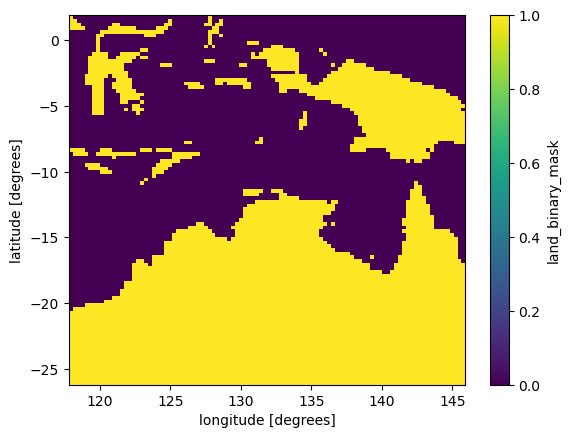

In [9]:
lbm_era = xr.DataArray.from_iris(mask_cube_era[1])
land_mask = lbm_era
land_mask.plot()

In [10]:
ERA_OROG_FILE = ERA_DIR / 'qrparm.orog'

In [11]:
era_orog = ants.load(ERA_OROG_FILE)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [12]:
da = xr.DataArray.from_iris(era_orog[0])

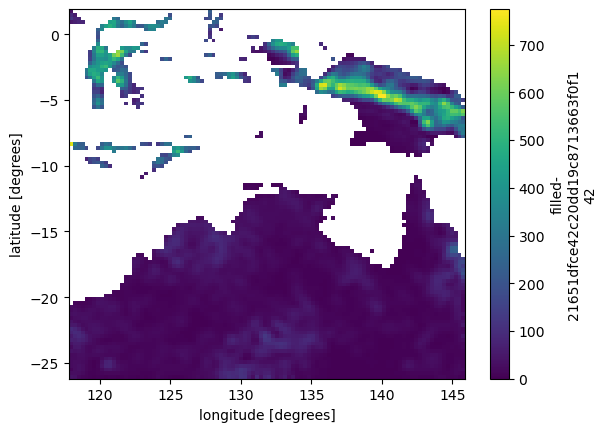

In [13]:
da.where(land_mask).plot()

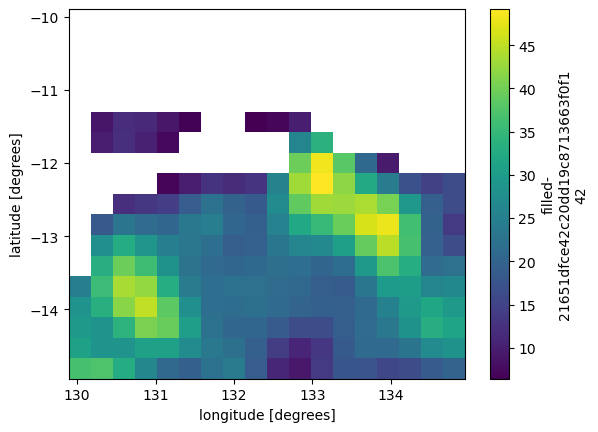

In [14]:
da.where(land_mask).sel(latitude=slice(-15,-10),longitude=slice(130,135)).plot()

In [52]:
chunk = da.sel(latitude=slice(-15,-10),longitude=slice(130,135))
mask = land_mask.sel(latitude=slice(-15,-10),longitude=slice(130,135))

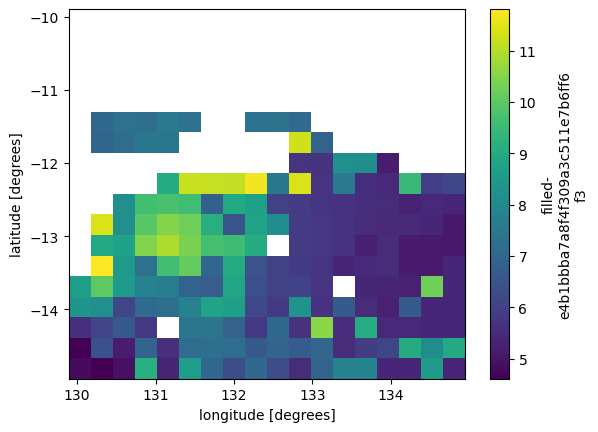

In [54]:
chunk[6,9]=np.nan
chunk[2,4] = np.nan
chunk[4,12] = np.nan
chunk.plot()

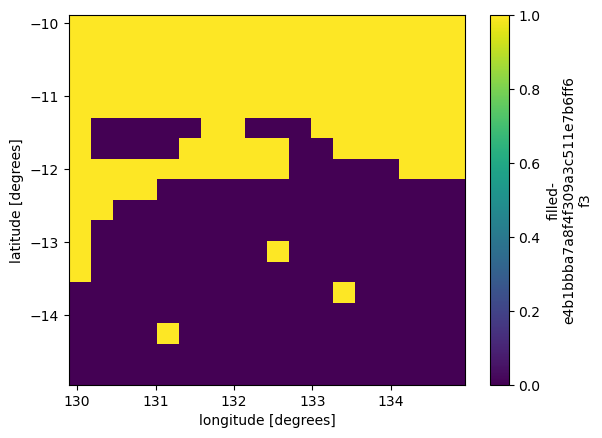

In [55]:
chunk.where(mask).isnull().plot()

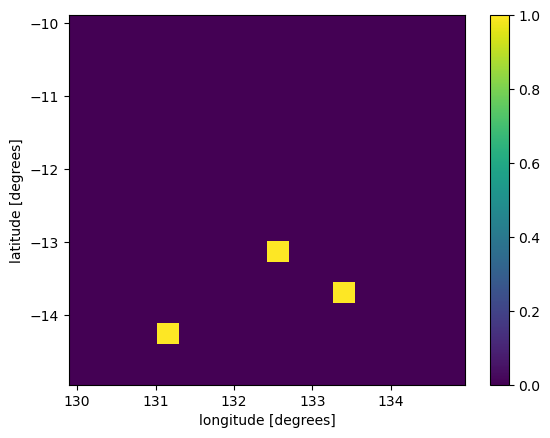

In [56]:
all_mask = mask & chunk.isnull()
all_mask.plot()

In [57]:
mask.values

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
chunk.isnull().values

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False],

In [59]:
all_mask.compute().sum() > 0

<xarray.DataArray ()> Size: 1B
array(True)

In [72]:
# Now try for a grid already has a lsm
ERA_SOIL_FILE = ERA_DIR / 'qrparm.soil'

In [73]:
era_soil = ants.load(ERA_SOIL_FILE)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [74]:
da = xr.DataArray.from_iris(era_soil[0])

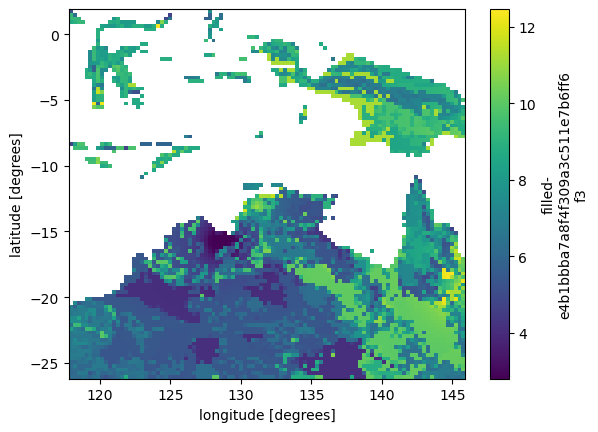

In [75]:
da.plot()

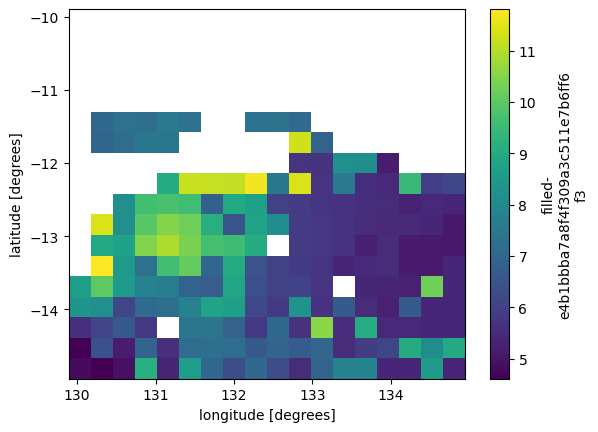

In [77]:
chunk = da.sel(latitude=slice(-15,-10),longitude=slice(130,135))
chunk[6,9]=np.nan
chunk[4,12]=np.nan
chunk[2,4] = np.nan
chunk.plot()

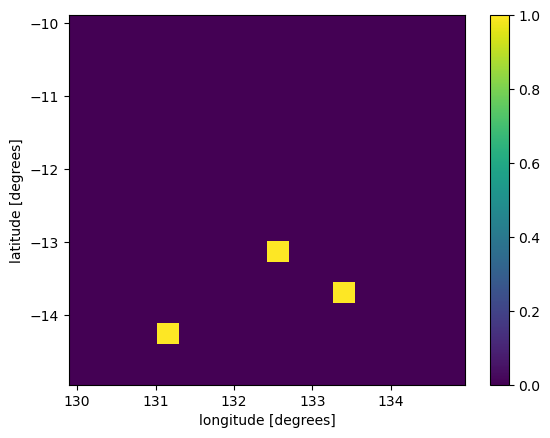

In [78]:
all_mask = mask & chunk.isnull()
all_mask.plot()

In [79]:
all_mask.compute().sum() > 0

<xarray.DataArray ()> Size: 1B
array(True)

In [80]:
# Find location of NaNs
all_mask.compute()
all_mask.where(all_mask.compute()==True,drop=True).compute()

<xarray.DataArray (latitude: 3, longitude: 3)> Size: 72B
array([[ 1., nan, nan],
       [nan, nan,  1.],
       [nan,  1., nan]])
Coordinates:
  * latitude   (latitude) float32 12B -14.25 -13.69 -13.12
  * longitude  (longitude) float32 12B 131.2 132.6 133.4

In [97]:
# Apply mask to another field
ERA_VEG_FILE = ERA_DIR / 'qrparm.veg.func'
era_veg= ants.load(ERA_VEG_FILE)
da = xr.DataArray.from_iris(era_veg[0])[0,0]

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [99]:
da.compute()

<xarray.DataArray 'canopy_height' (latitude: 100, longitude: 100)> Size: 80kB
array([[ 1.00438494,  1.01052961,  1.11317599, ...,  3.19424539,
         3.60413337,  4.17353135],
       [ 1.04897468,  1.1120474 ,  1.72762519, ...,  3.42359289,
         3.92342898,  4.7027113 ],
       [ 1.00020702,  1.11522425,  1.61694903, ...,  3.59218663,
         4.32375858,  3.05584094],
       ...,
       [29.06248295, 37.5271091 , 37.43223137, ...,         nan,
                nan,         nan],
       [37.9476252 , 31.03471087,         nan, ...,         nan,
                nan,         nan],
       [30.90623778,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
    time          datetime64[ns] 8B 2005-01-16T12:00:00
  * latitude      (latitude) float32 400B -26.06 -25.78 -25.5 ... 1.5 1.781
  * longitude     (longitude) float32 400B 117.9 118.2 118.5 ... 145.5 145.8
    pseudo_level  int64 8B 1
Attributes:
    standard_name:    canopy_height
    units:            m
    STASH:            m01s00i218
    grid_staggering:  6

In [4]:
la = []
lr = [4]
if la and lr:
    print ('use la and lr')
elif la:
    print ('use la')
elif lr:
    print ('use lr')
else:
    print ('use none')

use lr


In [102]:
da.where(all_mask.compute()==True,drop=True)

ValueError: Dimensions {'time', 'dim_0'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'latitude': 18, 'longitude': 18})

In [88]:
# Test mask for no NaNs

chunk = da.sel(latitude=slice(-15,-10),longitude=slice(130,135))
all_mask = mask & chunk.isnull()
all_mask.compute().sum() > 0

<xarray.DataArray ()> Size: 1B
array(False)